# B1 Matrix Completion and Recommendation System

## a

In [62]:
import pandas as pd
import scipy
from scipy.sparse.linalg import svds, eigs
import matplotlib.pyplot as plt

In [2]:
import csv
import numpy as np
data = []

with open("ml-100k/u.data") as csvfile:
    spamreader = csv.reader(csvfile, delimiter="\t") 
    for row in spamreader:
        data.append([int(row[0])-1, int(row[1])-1, int(row[2])]) 
data = np.array(data)

num_observations = len(data) 
num_users = max(data[:,0])+1 
num_items = max(data[:,1])+1

# num_observations = 100,000
# num_users = 943, indexed 0,...,942 
# num_items = 1682 indexed 0,...,1681

np.random.seed(1)
num_train = int(0.8*num_observations)
perm = np.random.permutation(data.shape[0]) 
train = data[perm[0:num_train],:]
test = data[perm[num_train::],:]

In [3]:
train

array([[507, 184,   5],
       [517, 741,   5],
       [177,  27,   5],
       ...,
       [322, 762,   4],
       [718, 519,   5],
       [127, 704,   3]])

In [5]:
movie_list = {}
for i in train:
    m_id = i[1]
    if m_id in movie_list.keys():
        value = movie_list.get(m_id) 
        movie_list.update({m_id: value+1})
    else:
        movie_list.update({m_id:1})
        
movie_avg = np.zeros((len(movie_list.keys()), 2))
movie_ids = list(movie_list.keys())
for i in range(len(movie_ids)):
    m = movie_ids[i]
    movie_avg[i, 0] = m
    movie_avg[i, 1] = train[train[:, 1]==m][:, 2].mean()

movie_avg

array([[1.84000000e+02, 4.09523810e+00],
       [7.41000000e+02, 3.66824645e+00],
       [2.70000000e+01, 3.92093023e+00],
       ...,
       [1.67600000e+03, 3.00000000e+00],
       [1.30800000e+03, 1.00000000e+00],
       [1.67300000e+03, 4.00000000e+00]])

In [23]:
movie_all_avg.shape

(1682, 2)

In [17]:
movie_all_avg = np.zeros((1682, 2))
for i in range(1682):
    movie_all_avg[i, 0] = i
    rat = movie_avg[movie_avg[:, 0]==i]
    if len(rat) != 0:
        rat = rat[0][1]
        movie_all_avg[i, 1] = rat
    else:
        movie_all_avg[i, 1] = 0
movie_all_avg

array([[0.00000000e+00, 3.82954545e+00],
       [1.00000000e+00, 3.28431373e+00],
       [2.00000000e+00, 3.00000000e+00],
       ...,
       [1.67900000e+03, 2.00000000e+00],
       [1.68000000e+03, 3.00000000e+00],
       [1.68100000e+03, 0.00000000e+00]])

In [31]:
movie_all_avg[movie_all_avg[:,0]==1][0][1]

3.284313725490196

In [32]:
total_aqrd_error = 0
test_pred = np.zeros((len(test), 1))
for i in range(len(test)):
    m_id = test[i, 1]
    predicted = movie_all_avg[movie_all_avg[:,0]==m_id][0][1]
    true = test[i, 2]
    total_aqrd_error += (predicted - true)**2
avg_error = total_aqrd_error / len(test)
print("avg_error", avg_error)

avg_error 1.063564200567445


## b

In [ ]:
tilta_R = np.zeros((num_items, num_users))

for i in range(num_items):
    for j in range(num_users):

        user = train[train[:, 0] == j]
        rat = user[user[:, 1] == i]
        if len(rat) != 0:
            rat = rat[0][2]
            tilta_R[i, j] = rat
        else:
            tilta_R[i, j] = 0

    print(i, j, tilta_R[i, j])
    
# pd.DataFrame(tilta_R).to_csv("tilta_R.csv")

In [36]:
tilta_R2 = pd.read_csv("tilta_R.csv").to_numpy()[:, 1:]

k = 100
u, s, vt = svds(tilta_R2, k=k)
S = np.zeros((k, k))
np.fill_diagonal(S, s)


In [40]:
tilta_R2

array([[0., 4., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
print(u.shape)
print(S.shape)
print(vt.shape)

(1682, 100)
(100, 100)
(100, 943)


In [39]:

A = u @ S @ vt
A

array([[ 1.68491785e-01,  3.74566096e+00, -2.07289712e-02, ...,
         9.08784909e-02,  1.70339098e+00, -3.67264530e-01],
       [ 4.10215120e+00, -8.74435404e-02, -3.37271399e-01, ...,
         5.40832380e-02, -2.87869467e-01,  2.10979450e+00],
       [-1.87029730e-02,  2.45800482e-01, -4.65160861e-01, ...,
         3.98471740e-01, -3.16490357e-01,  1.46721517e+00],
       ...,
       [ 1.05005260e-02,  2.14011080e-03,  5.42622108e-02, ...,
        -1.97558568e-02, -1.71819826e-02, -5.35035372e-03],
       [-4.21455328e-02,  2.63048441e-02,  5.11801252e-03, ...,
         6.28951783e-03,  7.44763464e-02, -4.97909951e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [41]:
A[1, 0:10]

array([ 4.1021512 , -0.08744354, -0.3372714 , -0.67702148,  1.91937759,
       -0.16795754,  0.1880254 ,  0.7252656 ,  0.18281698, -1.30764163])

In [42]:
tilta_R2[1, 0:10]

array([3., 0., 0., 0., 3., 0., 0., 0., 0., 0.])

In [45]:
np.mean((A - tilta_R2)**2)

0.22770634457348543

In [54]:
train[1, 2]
A[train[1, 1], train[1, 2]]

-0.6491117602268884

In [56]:
# train avg squared error
tot = 0
for i in range(len(train)):
    u_id = train[i, 0]      # user id
    m_id = train[i, 1]
    true = train[i, 2]
    pred = A[m_id, u_id]
    tot += (true - pred)**2
#     print(tot)
avg_tot_train = tot / len(train)
print("avg_tot: ", avg_tot_train)

avg_tot:  2.6762999962131095


In [57]:
# test avg squared error
tot = 0
for i in range(len(test)):
    u_id = test[i, 0]      # user id
    m_id = test[i, 1]
    true = test[i, 2]
    pred = A[m_id, u_id]
    tot += (true - pred)**2
#     print(tot)
avg_tot_test = tot / len(test)
print("avg_tot: ", avg_tot_test)

avg_tot:  10.060496672885302


In [68]:
### actual running code

In [74]:
train_error_list = []
test_error_list = []
d_list = [1, 2, 5, 10, 20, 50]

for d in d_list:
    k = d
    print(k)
    # reconstruct
    u, s, vt = svds(tilta_R2, k=k)

    S = np.zeros((k, k))
    np.fill_diagonal(S, s)
    A = u @ S @ vt
#     A = u @ vt
    
    # train avg squared error
    tot = 0
    for i in range(len(train)):
        u_id = train[i, 0]      # user id
        m_id = train[i, 1]
        true = train[i, 2]
        pred = A[m_id, u_id]
        tot += (true - pred)**2
    #     print(tot)
    avg_tot_train = tot / len(train)
    train_error_list.append(avg_tot_train)
    print("avg_tot: ", avg_tot_train)
    
    # test avg squared error
    tot = 0
    for i in range(len(test)):
        u_id = test[i, 0]      # user id
        m_id = test[i, 1]
        true = test[i, 2]
        pred = A[m_id, u_id]
        tot += (true - pred)**2
    #     print(tot)
    avg_tot_test = tot / len(test)
    test_error_list.append(avg_tot_test)
    print("avg_tot: ", avg_tot_test)

1
avg_tot:  8.59214358904609
avg_tot:  8.545489377190906
2
avg_tot:  7.931860030081017
avg_tot:  7.949294110741517
5
avg_tot:  6.897781222583135
avg_tot:  7.139870674685605
10
avg_tot:  6.149907061828556
avg_tot:  6.752294626992536
20
avg_tot:  5.444741978303312
avg_tot:  6.894670334447281
50
avg_tot:  4.115823122038067
avg_tot:  8.261033645154349


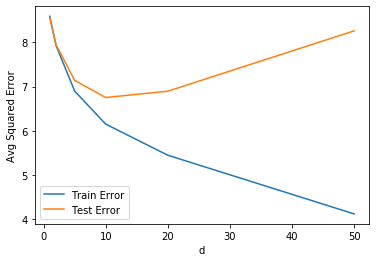

In [75]:
plt.plot(d_list, train_error_list, label="Train Error")
plt.plot(d_list, test_error_list, label="Test Error")
plt.legend()
plt.xlabel("d")
plt.ylabel("Avg Squared Error")
plt.show()

## c : Alternating Minimization Algorithm

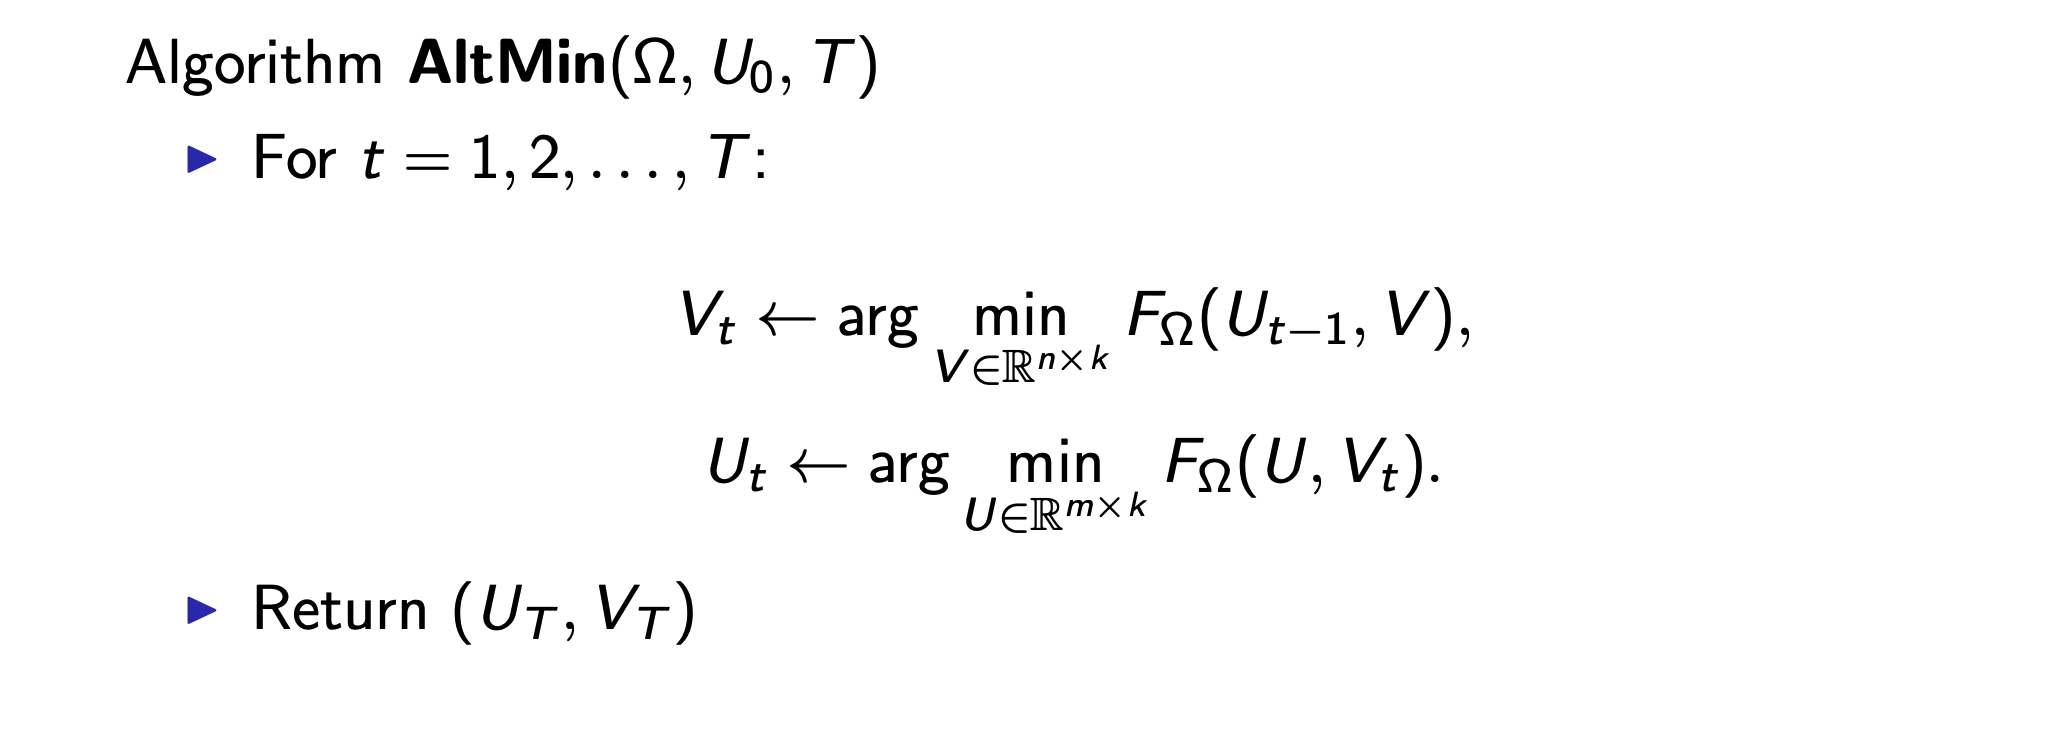

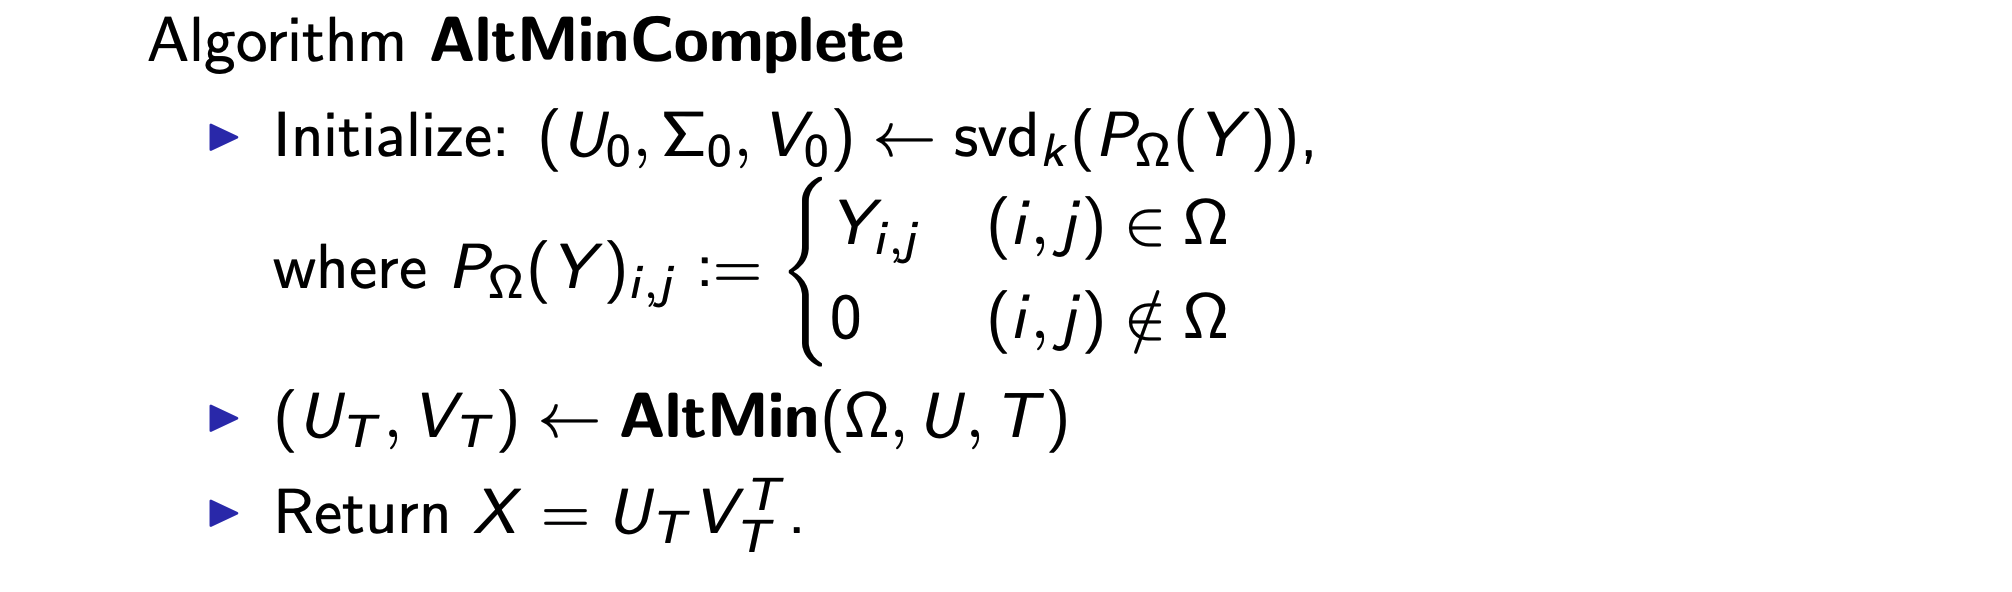

In [106]:
tilta_R2 = pd.read_csv("tilta_R.csv").to_numpy()[:, 1:]

train_error_list = []
test_error_list = []
# d_list = [1, 2, 5, 10, 20, 50]
d_list = [1, 2, 5, 10, 20]
for d in d_list:
    print(d)
    UT = np.zeros((num_items, d))
    VT = np.zeros((d, num_users))
    for d_i in range(d):
        print(d_i)
        u, s, vt = svds(tilta_R2, k=d)
        loss_u_list = [loss(i, d_i, d) for i in range(d)]
        loss_vt_list = [loss(d_i, j, d) for j in range(d)]
        Ut = u[:,loss_u_list.index(np.min(loss_u_list))]
        Vt = vt[loss_vt_list.index(np.min(loss_vt_list)), :]
        UT[:, d_i] = Ut
        VT[d_i, :] = Vt
    A = UT @ VT
    
    tot = 0
    for i in range(len(train)):
        u_id = train[i, 0]      # user id
        m_id = train[i, 1]
        true = train[i, 2]
        pred = A[m_id, u_id]
        tot += (true - pred)**2
    #     print(tot)
    avg_tot_train = tot / len(train)
    print("avg_tot: ", avg_tot_train)
    
    # test avg squared error
    tot = 0
    for i in range(len(test)):
        u_id = test[i, 0]      # user id
        m_id = test[i, 1]
        true = test[i, 2]
        pred = A[m_id, u_id]
        tot += (true - pred)**2
    #     print(tot)
    avg_tot_test = tot / len(test)
    test_error_list.append(avg_tot_test)
    print("avg_tot: ", avg_tot_test)
    


1
0
avg_tot:  13.744087487539327
avg_tot:  13.744087487539327
avg_tot:  13.744087487539327
avg_tot:  13.594959626051784
2
0
avg_tot:  13.751985724981994
avg_tot:  13.756928451775803
avg_tot:  13.751985724981994
avg_tot:  13.756929075184889
1
avg_tot:  13.756929075184889
avg_tot:  13.744087487539327
avg_tot:  13.756928451775803
avg_tot:  13.744087487539327
avg_tot:  13.73915002811741
avg_tot:  13.590562887914889
5
0
avg_tot:  13.75369071375404
avg_tot:  13.756927584394795
avg_tot:  13.75692764393128
avg_tot:  13.7569277970438
avg_tot:  13.756928113980567
avg_tot:  13.75369071375404
avg_tot:  13.756928118449732
avg_tot:  13.756928205028554
avg_tot:  13.756928133220478
avg_tot:  13.756929044366567
1
avg_tot:  13.756928118449732
avg_tot:  13.753642025543979
avg_tot:  13.756928007229964
avg_tot:  13.756928182484748
avg_tot:  13.756928836742178
avg_tot:  13.756927584394663
avg_tot:  13.753642025543979
avg_tot:  13.756928036353594
avg_tot:  13.756927924265977
avg_tot:  13.756928854353834
2
av

avg_tot:  13.756928459002292
avg_tot:  13.756928250225995
avg_tot:  13.756928281005019
avg_tot:  13.756928474867317
avg_tot:  13.75692938794314
avg_tot:  13.755156370071738
avg_tot:  13.756928422090656
avg_tot:  13.756928523157278
avg_tot:  13.756928822070995
avg_tot:  13.756928215622466
avg_tot:  13.75692864040386
avg_tot:  13.756928225559642
avg_tot:  13.75692815095904
avg_tot:  13.756927995368043
avg_tot:  13.756927954542416
avg_tot:  13.756928502351247
avg_tot:  13.756928013223625
avg_tot:  13.756928453884498
avg_tot:  13.756928336734743
avg_tot:  13.756928351399404
avg_tot:  13.756927617347241
avg_tot:  13.756928080606361
avg_tot:  13.756928068540715
avg_tot:  13.756927889835078
avg_tot:  13.75692905214621
1
avg_tot:  13.756928422090656
avg_tot:  13.75513606989607
avg_tot:  13.756928256662064
avg_tot:  13.756928264076015
avg_tot:  13.756928503627993
avg_tot:  13.756928532089217
avg_tot:  13.75692900120478
avg_tot:  13.756928855154364
avg_tot:  13.756928531066823
avg_tot:  13.75692

avg_tot:  13.756929166323333
avg_tot:  13.756929050896227
avg_tot:  13.756928855154364
avg_tot:  13.756929098509762
avg_tot:  13.756929440592106
avg_tot:  13.756928688774932
avg_tot:  13.7569293231185
avg_tot:  13.756928768523194
avg_tot:  13.754951942452555
avg_tot:  13.75692857520868
avg_tot:  13.756928467071457
avg_tot:  13.756929171839237
avg_tot:  13.756928610262014
avg_tot:  13.756929270220976
avg_tot:  13.75692908461829
avg_tot:  13.756929024009295
avg_tot:  13.75692780435897
avg_tot:  13.756928531888622
avg_tot:  13.75692845415299
avg_tot:  13.756928136160422
avg_tot:  13.756930008393185
8
avg_tot:  13.756927995368043
avg_tot:  13.756928304885552
avg_tot:  13.756927913965264
avg_tot:  13.756927928948972
avg_tot:  13.756927945911732
avg_tot:  13.756928313987975
avg_tot:  13.756928582075188
avg_tot:  13.756928575208693
avg_tot:  13.754920325823468
avg_tot:  13.756928504928434
avg_tot:  13.756927915613408
avg_tot:  13.756928077520875
avg_tot:  13.756928044917213
avg_tot:  13.75692

avg_tot:  13.756929095056316
avg_tot:  13.756928327275766
avg_tot:  13.756928777535734
avg_tot:  13.756928495051913
avg_tot:  13.756928424461957
avg_tot:  13.756928244870407
avg_tot:  13.756928218703553
avg_tot:  13.756928696993665
avg_tot:  13.75692826592295
avg_tot:  13.756928692579269
avg_tot:  13.756928670603454
avg_tot:  13.753916669784006
avg_tot:  13.75692763291217
avg_tot:  13.756928157868103
avg_tot:  13.756928194925955
avg_tot:  13.756927946834866
avg_tot:  13.756929430964394
15
avg_tot:  13.756927617347232
avg_tot:  13.756927896858716
avg_tot:  13.756927404432963
avg_tot:  13.756927367091365
avg_tot:  13.756927742772875
avg_tot:  13.756927687927632
avg_tot:  13.756928071850146
avg_tot:  13.75692780435897
avg_tot:  13.75692762382332
avg_tot:  13.756927970454958
avg_tot:  13.756927402125825
avg_tot:  13.756927496639898
avg_tot:  13.75692741491416
avg_tot:  13.756927601777655
avg_tot:  13.75692763291217
avg_tot:  13.75369071375404
avg_tot:  13.756927584394795
avg_tot:  13.75692

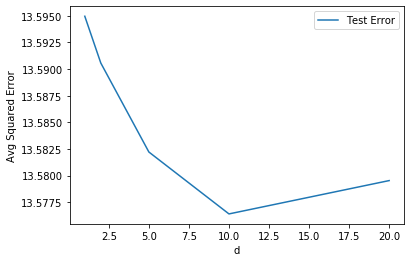

In [108]:
# plt.plot(d_list, train_error_list, label="Train Error")
plt.plot(d_list, test_error_list, label="Test Error")
plt.legend()
plt.xlabel("d")
plt.ylabel("Avg Squared Error")
plt.show()

In [117]:
def loss(ui, vj):
#     u, s, vt = svds(tilta_R2, k=k)
#     S = np.zeros((k, k))
#     np.fill_diagonal(S, s)
#     A = u[:,i].reshape((-1,1)) @ vt [j,:].reshape((1,-1))
    A = ui @ vj

    # train avg squared error
    tot = 0
    for i in range(len(train)):
        u_id = train[i, 0]      # user id
        m_id = train[i, 1]
        true = train[i, 2]
        pred = A[m_id, u_id]
        tot += (true - pred)**2
    #     print(tot)
    avg_tot_train = tot / len(train)
    print("avg_tot: ", avg_tot_train)
    return avg_tot_train
    

In [144]:
k = 200
ui, s, vj = svds(tilta_R2, k=k)
S = np.zeros((k, k))
np.fill_diagonal(S, s)
A = ui @ S @  vj

# train avg squared error
tot = 0
for i in range(len(train)):
    u_id = train[i, 0]      # user id
    m_id = train[i, 1]
    true = train[i, 2]
    pred = A[m_id, u_id]
    tot += (true - pred)**2
#     print(tot)
avg_tot_train = tot / len(train)
print("avg_tot: ", avg_tot_train)
A

avg_tot:  1.162897055104414


array([[-9.55368712e-02,  3.97182496e+00, -2.34071558e-01, ...,
         1.34039491e-01,  4.62834977e-01,  5.64876116e-02],
       [ 2.93932681e+00,  2.76740220e-01, -1.90092522e-01, ...,
        -1.50331984e-01,  2.26744995e-01,  3.43199797e+00],
       [-3.45020331e-01,  6.12645966e-01, -4.31725492e-01, ...,
         3.70135186e-01,  2.23292468e-01,  1.16792212e+00],
       ...,
       [-2.74898233e-02, -1.70283960e-03,  8.12296660e-02, ...,
        -1.63112985e-02, -4.51198310e-02, -4.22801789e-02],
       [-8.08097912e-02, -2.56726960e-02, -6.09977766e-03, ...,
         2.53079073e-02, -1.86324910e-02, -4.67426402e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [135]:
print(true, pred)


3 0.0035871317630866008


In [88]:
k=50
i = 0
j = 5
u, s, vt = svds(tilta_R2, k=k)
S = np.zeros((k, k))
np.fill_diagonal(S, s)
A = u[:,i].reshape((-1,1)) @ vt [j,:].reshape((1,-1))

# train avg squared error
tot = 0
for i in range(len(train)):
    u_id = train[i, 0]      # user id
    m_id = train[i, 1]
    true = train[i, 2]
    pred = A[m_id, u_id]
    tot += (true - pred)**2
#     print(tot)
avg_tot_train = tot / len(train)
print("avg_tot: ", avg_tot_train)

avg_tot:  13.756928712570804


In [95]:

u[:,1] = np.zeros((num_items))

In [85]:
vt [j,:].reshape((1,-1)).shape

(1, 943)

In [96]:
u

array([[ 6.00835073e-02,  0.00000000e+00,  9.62483337e-04, ...,
         6.59679649e-03,  8.95657382e-02,  9.17898427e-02],
       [ 3.38607574e-02,  0.00000000e+00, -1.06183220e-02, ...,
         6.08058336e-02,  1.00206767e-02,  3.41590811e-02],
       [-8.56589307e-03,  0.00000000e+00, -2.71626435e-02, ...,
         8.94332574e-03,  3.04676703e-02,  1.92140872e-02],
       ...,
       [ 1.29814850e-03,  0.00000000e+00,  1.03753286e-03, ...,
        -7.12724855e-04,  5.15353640e-04,  3.76394588e-05],
       [ 3.16154322e-04,  0.00000000e+00, -8.18969391e-05, ...,
         5.33637122e-04, -3.77643169e-05,  4.00801123e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])